In [17]:
importlib.reload(cleanfunc)
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import os
from textwrap import wrap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import eli5
from cleanfunc import load_merge_clean, sort_series_abs
import re
from sklearn.metrics import r2_score



In [2]:
df = load_merge_clean()
df.head()

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,NUMBER OF BUSINESSES Number of non-employing businesses no.,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,BUSINESS ENTRIES Total number of business entries no.,...,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %,lat,long
LABEL,,,,,,,,,,,,,,,,,,,,,
Braidwood,404.0,149.0,33.0,3.0,589.0,42.0,15.0,6.550351,3.855263,52.0,...,0.748598,0.5,35.3,14.6,85.0,3.2,11.7,3.4,-35.444450,149.799675
Karabar,209.0,106.0,17.0,3.0,335.0,25.0,19.0,6.550351,3.855263,38.0,...,0.748598,0.8,24.5,8.1,89.7,4.0,6.2,13.5,-35.375943,149.232872
Queanbeyan,402.0,193.0,89.0,27.0,712.0,75.0,32.0,5.000000,3.855263,111.0,...,0.100000,2.1,28.5,10.5,80.6,11.2,8.2,21.2,-35.352466,149.233725
Queanbeyan - East,292.0,144.0,90.0,24.0,554.0,39.0,23.0,4.000000,3.855263,67.0,...,0.200000,2.6,27.4,9.2,82.0,11.4,6.4,20.4,-35.345549,149.246507
Queanbeyan Region,915.0,487.0,119.0,9.0,1526.0,149.0,50.0,3.000000,3.855263,202.0,...,0.748598,0.6,32.5,12.2,87.8,2.6,9.7,5.8,-35.352466,149.233725


In [3]:
cycle_col = 'METHOD OF TRAVEL TO WORK - EMPLOYED PERSONS Used one method - Bicycle no.'

y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']
df = df[y<0.1]
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']
X = df.drop([cycle_col], axis = 1)


Text(0.5,1,'Percentage cyclists histogram')

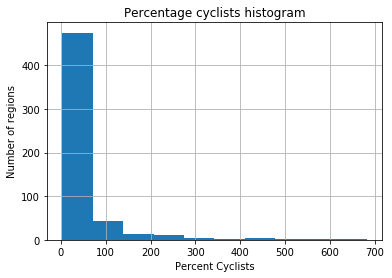

In [13]:
df[cycle_col].hist()
plt.xlabel('Percent Cyclists')
plt.ylabel('Number of regions')
plt.title('Percentage cyclists histogram')

Text(0.5,1,'Percentage cyclists histogram')

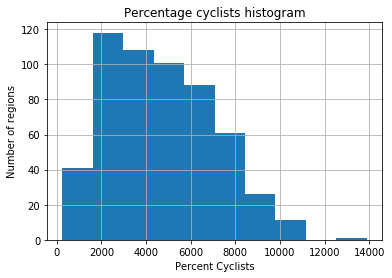

In [14]:
df['HOUSEHOLDS BY TYPE Total households no.'].hist()
plt.xlabel('Percent Cyclists')
plt.ylabel('Number of regions')
plt.title('Percentage cyclists histogram')

In [24]:
corrmat = sort_series_abs(df.dropna(subset=[cycle_col]
                         ).corr().loc[:,cycle_col])[1:]
corrmat.index[0]

'JOBS IN AUSTRALIA Number of Employee Jobs - Information media and telecommunications no.'

In [34]:
df.index[df[cycle_col]>300]

Index(['Marrickville', 'Petersham - Stanmore', 'Erskineville - Alexandria',
       'Glebe - Forest Lodge', 'Newtown - Camperdown - Darlington',
       'Redfern - Chippendale', 'Waterloo - Beaconsfield',
       'Bondi - Tamarama - Bronte', 'Coogee - Clovelly', 'Randwick - North',
       'Leichhardt - Annandale'],
      dtype='object', name='LABEL')

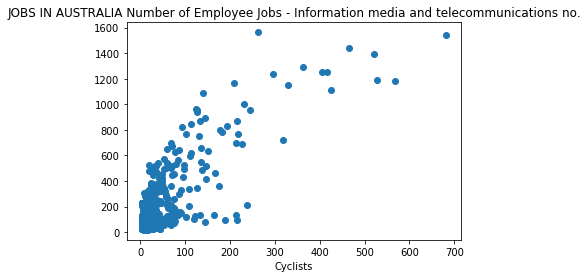

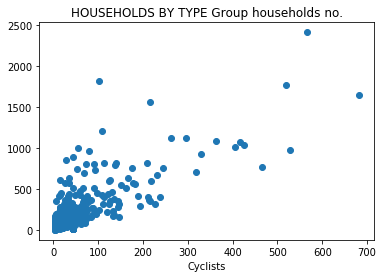

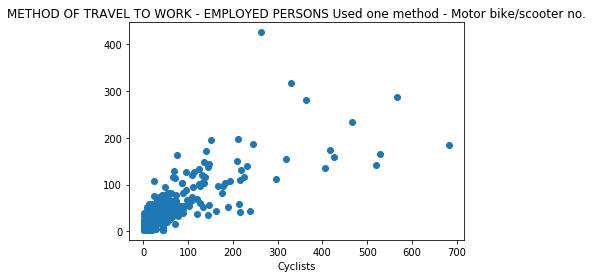

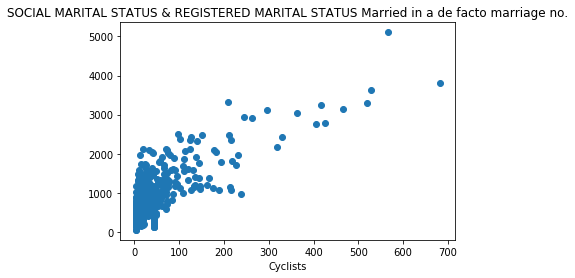

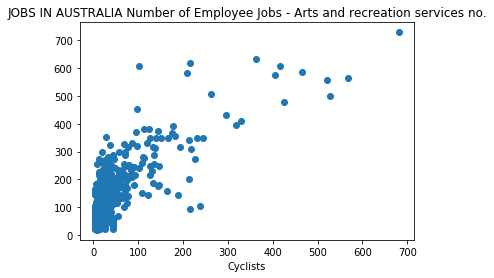

In [32]:
for i in range(5):
    
    plt.scatter(df[cycle_col], df[corrmat.index[i]])
    plt.xlabel('Cyclists')
    #plt.ylabel(corrmat.index[i])
    plt.title(corrmat.index[i])
    plt.show()

In [4]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X))
df_scaled.columns = X.columns
df_scaled.index = X.index
df_scaled.head()


,NUMBER OF BUSINESSES Number of non-employing businesses no.,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,BUSINESS ENTRIES Total number of business entries no.,...,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %,lat,long
LABEL,,,,,,,,,,,,,,,,,,,,,
Braidwood,-0.327072,-0.502118,-0.471188,-0.324231,-0.389342,-0.422189,-0.551703,0.000000,2.144778e-16,-0.478352,...,-2.516031e-16,-0.228918,1.154706,1.428101,0.083989,-0.671884,1.316052,-0.770357,-1.118025,-0.246354
Karabar,-0.507310,-0.591135,-0.563942,-0.324231,-0.530377,-0.506950,-0.502942,0.000000,2.144778e-16,-0.526012,...,-2.516031e-16,0.039727,-0.103942,-0.400361,0.617691,-0.573461,-0.258599,-0.311714,-1.080517,-0.446432
Queanbeyan,-0.328921,-0.411030,-0.146548,-0.019688,-0.321045,-0.257653,-0.344471,-0.146511,2.144778e-16,-0.277497,...,-2.939758e-01,1.203853,0.362224,0.274763,-0.415648,0.312345,0.314002,0.037944,-1.067663,-0.446131
Queanbeyan - East,-0.430593,-0.512468,-0.140751,-0.057756,-0.408776,-0.437147,-0.454182,-0.241013,2.144778e-16,-0.427287,...,-2.486510e-01,1.651593,0.234028,-0.090929,-0.256672,0.336951,-0.201339,0.001616,-1.063876,-0.441619
Queanbeyan Region,0.145243,0.197602,0.027366,-0.248095,0.130935,0.111305,-0.125048,-0.335515,2.144778e-16,0.032296,...,-2.516031e-16,-0.139369,0.828390,0.752977,0.401939,-0.745701,0.743452,-0.661373,-1.067663,-0.446131


In [23]:
pca = PCA()
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

0.8822305792237051


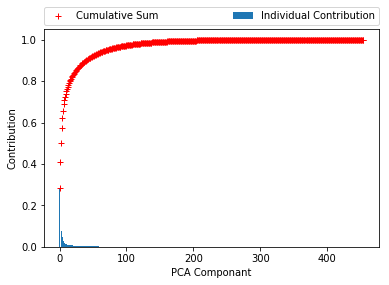

In [24]:
pareto = np.cumsum(pca.explained_variance_ratio_)
print(pareto[33])
plt.plot(pareto, 'r+', label = "Cumulative Sum")
plt.bar(x = range(0, pareto.shape[0]), height = pca.explained_variance_ratio_, label = "Individual Contribution")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("PCA Componant")
plt.ylabel("Contribution")
plt.show()

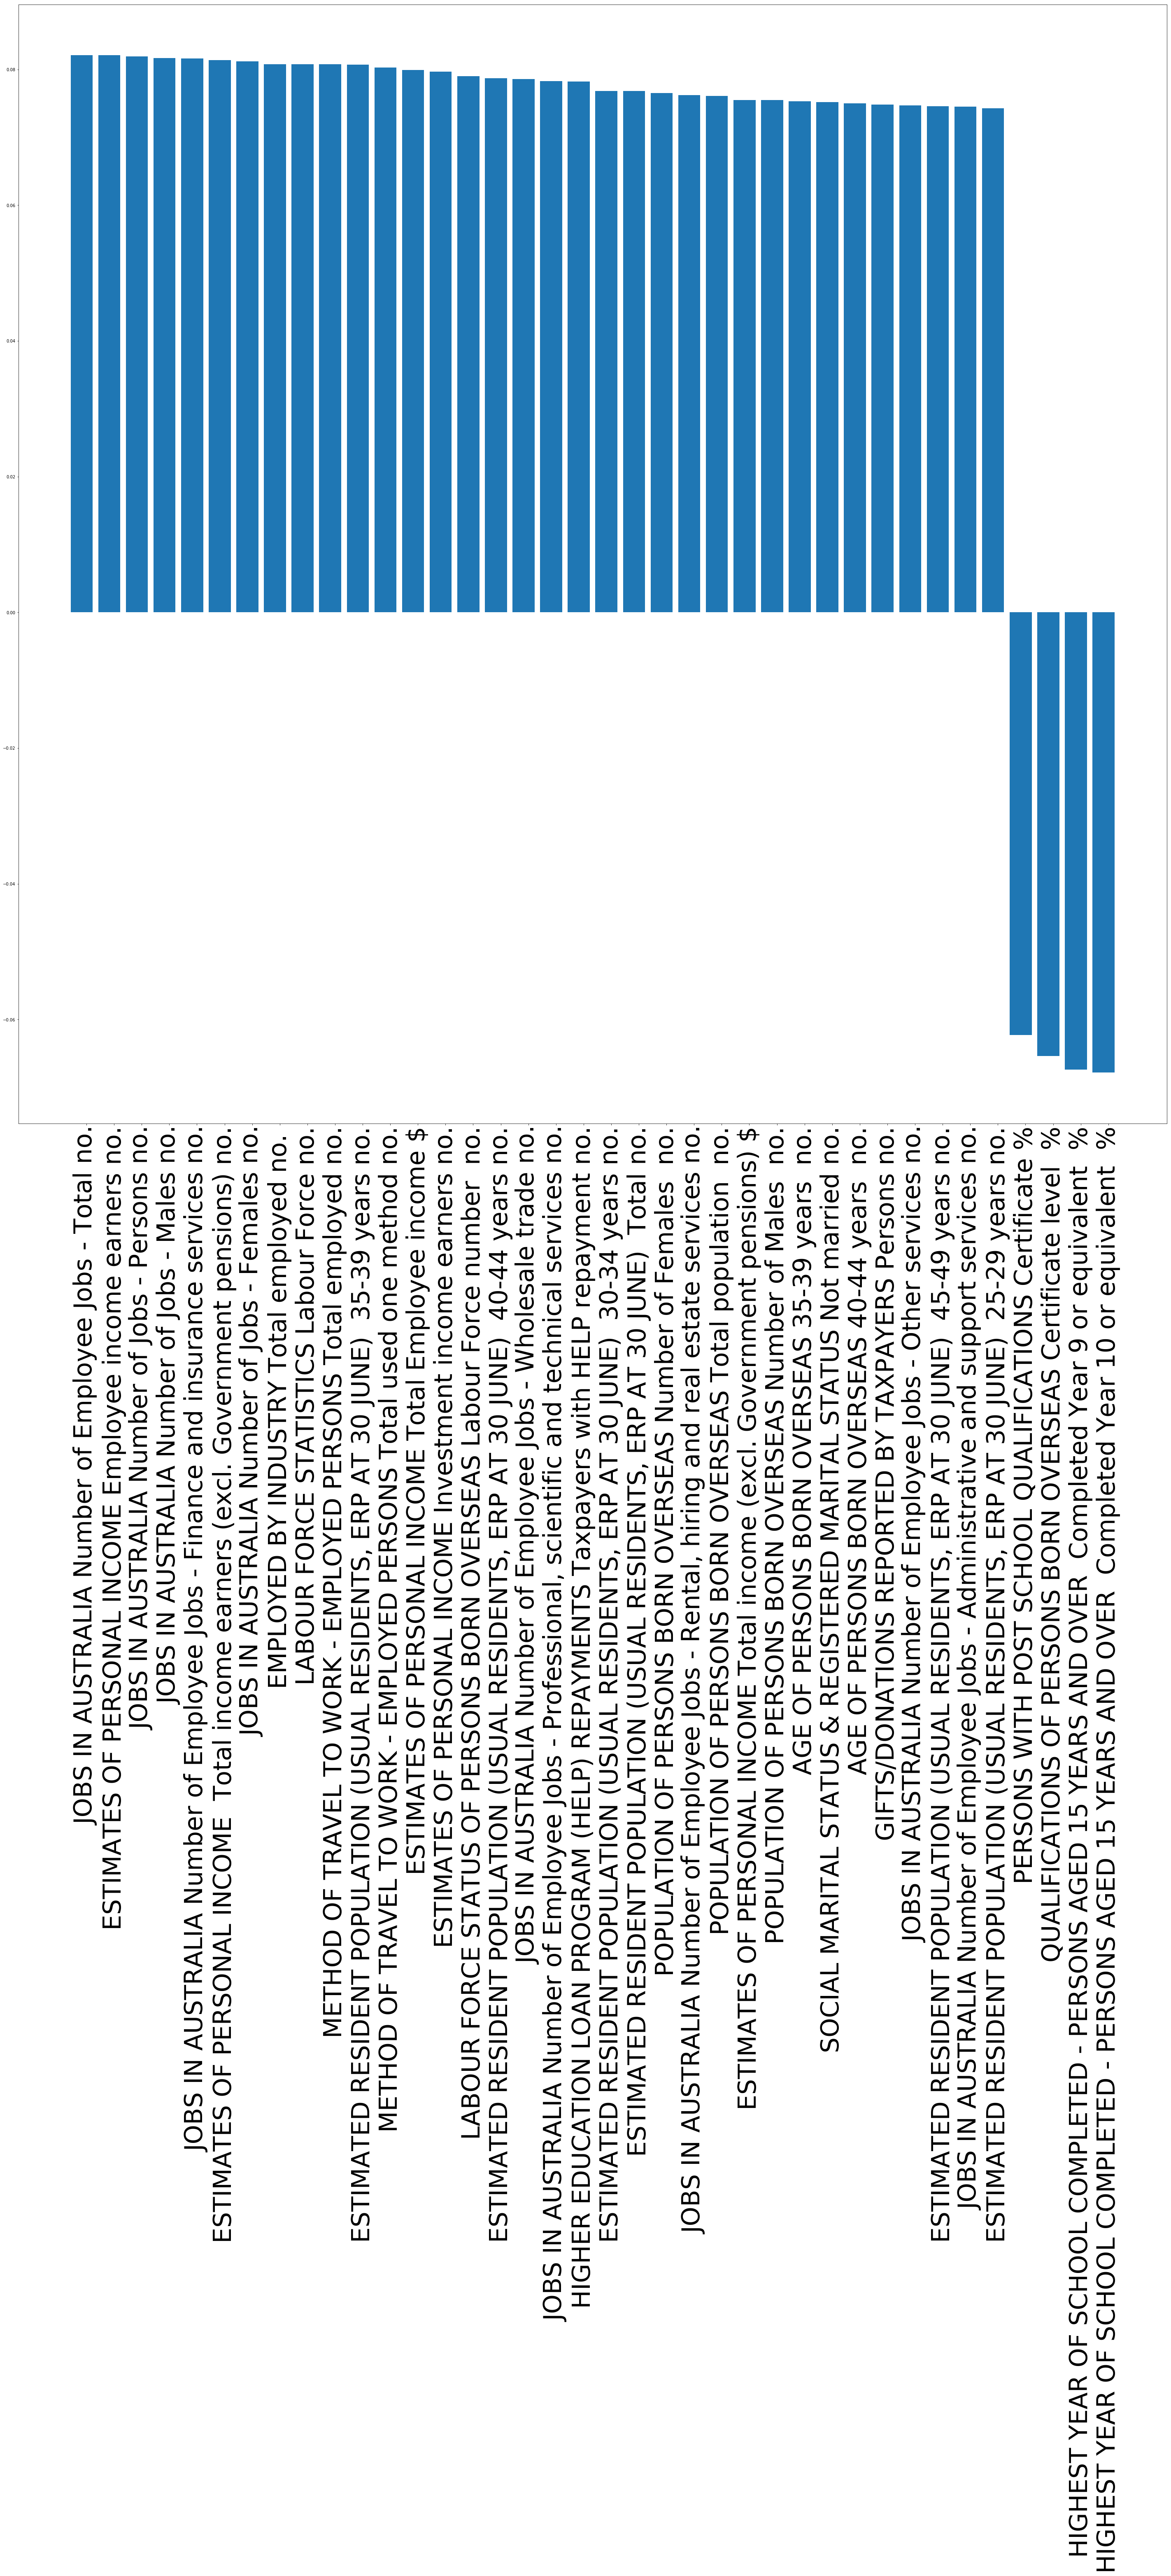

In [10]:
def pca_results(full_dataset, pca, i):

    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    component = (components.iloc[i, :].sort_values(ascending = False))
    maxcomp = component.max()
    mincomp = component.min()
    component = component[(component > maxcomp *0.9) | (component < mincomp * 0.9)]
    #print(component)
    fig, ax = plt.subplots(figsize=(50,50))
    index = np.arange(component.shape[0])
    plt.bar(x = index, height = component)
    bar_width = 0.35
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(component.index)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(60) 
        # specify integer or one of preset strings, e.g.
        #tick.label.set_fontsize('x-small') 
        tick.label.set_rotation('vertical')
    plt.show()
pca_results(df_scaled, pca, 0)

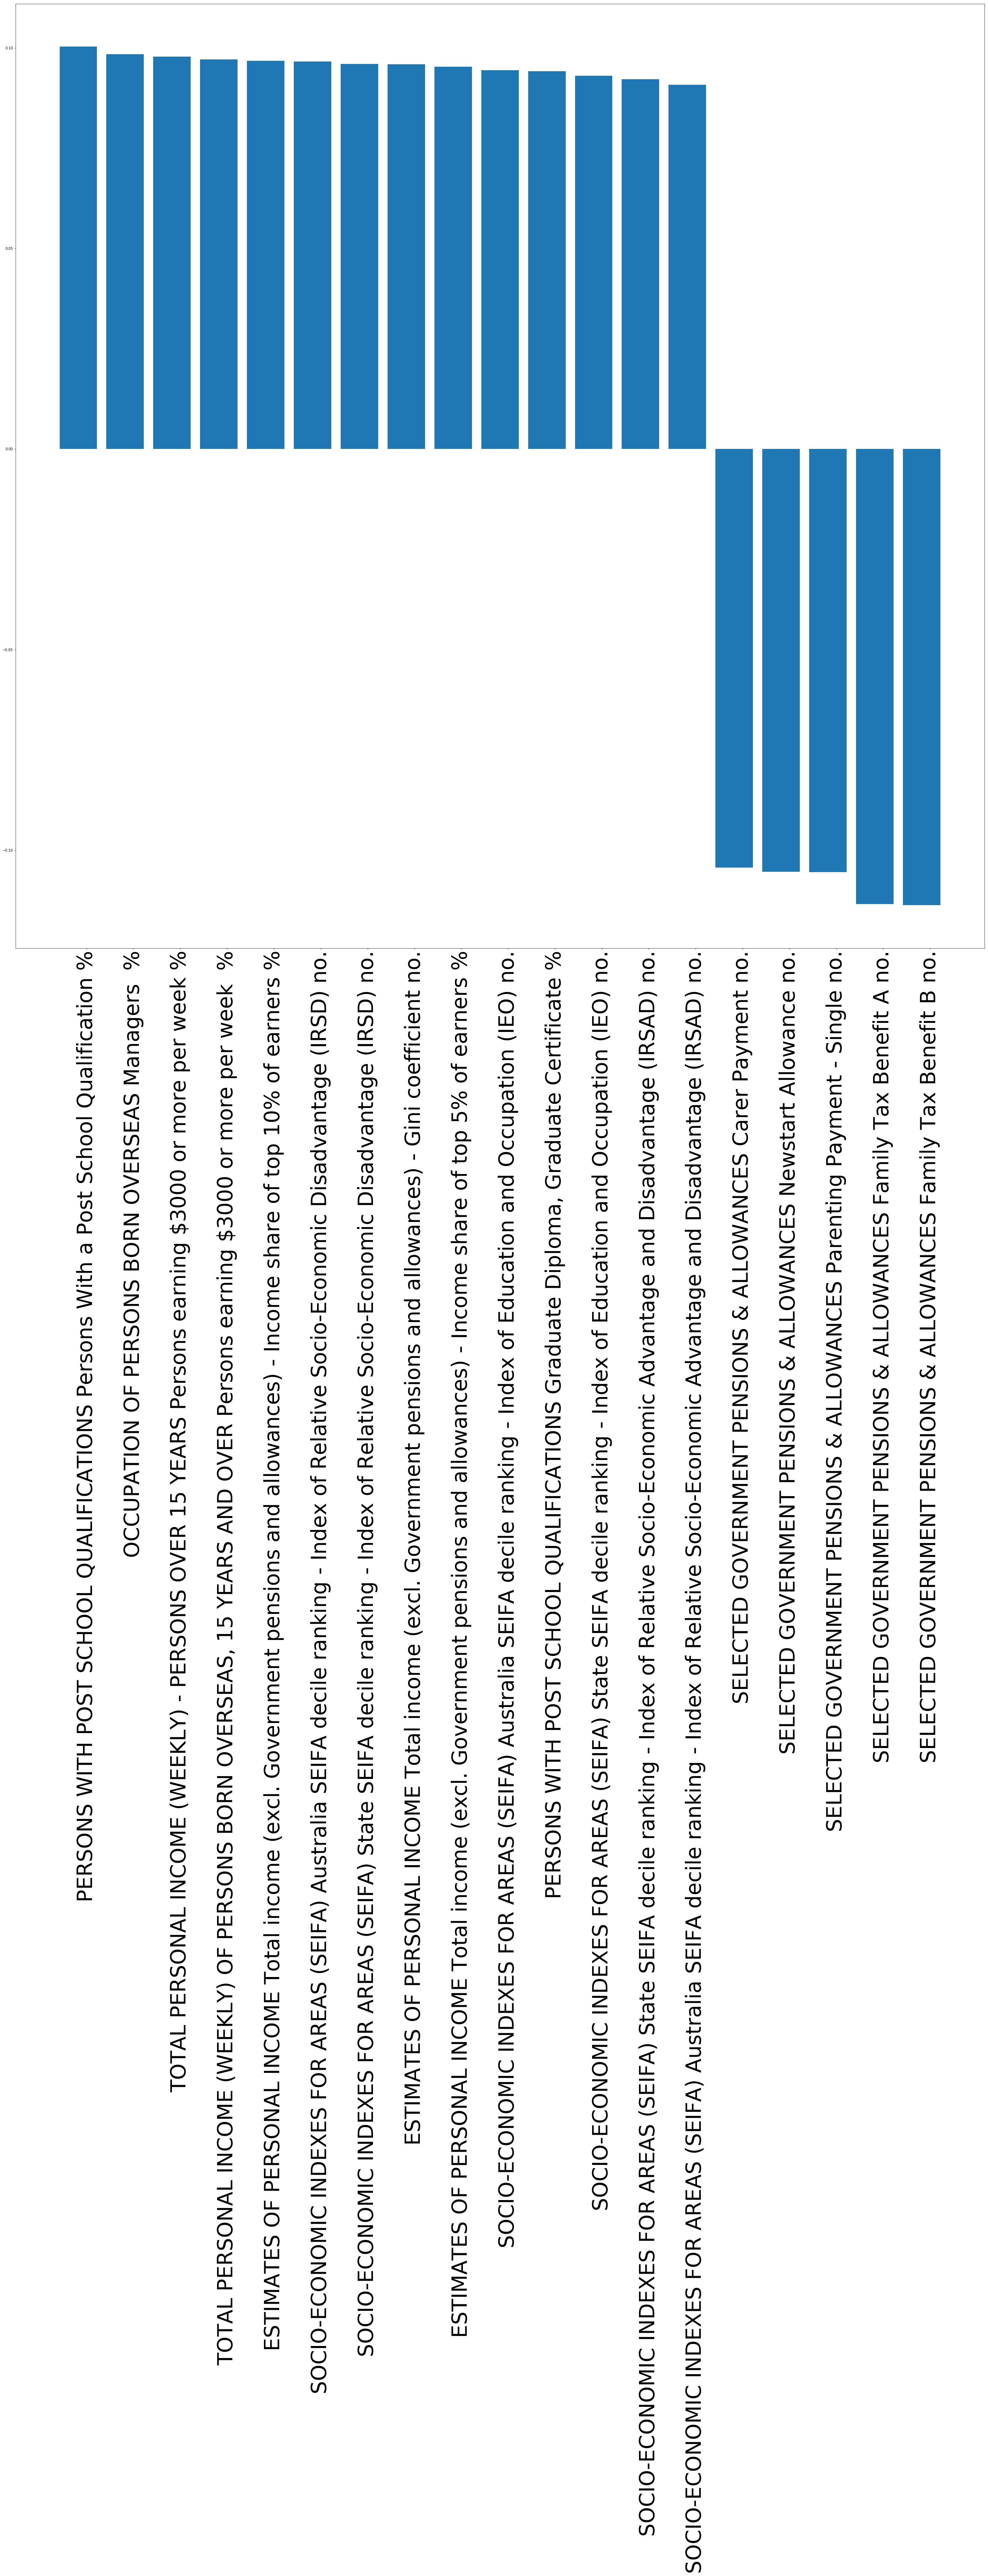

In [37]:
pca_results(df_scaled, pca, 1)

In [25]:
df_pca = pd.DataFrame(pca.transform(df_scaled))

In [26]:
df_pca = df_pca.iloc[:, 0:20]

In [27]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-13.396425,7.956873,3.446825,0.568058,-0.483728,0.940906,2.606732,-2.424035,5.509200,-1.537733,1.352286,0.848383,-1.587099,-0.186125,1.308223,0.098645,0.665516,3.360759,1.216850,1.397822
1,-6.135019,0.336313,-0.853763,-4.270691,4.134952,-3.757141,-4.059607,2.033409,1.612933,-0.183854,-1.610730,-0.092859,-2.816995,0.910690,2.407677,3.500173,1.382693,4.061169,4.523201,0.753551
2,-0.786541,-1.225421,1.918495,-1.644434,0.447338,-7.274685,-4.725130,0.219100,-0.269116,0.897074,0.164639,0.790955,-5.515420,2.907855,2.600547,4.297724,3.089539,4.437230,4.196760,0.116730
3,-5.775804,5.068993,4.595811,-6.187579,2.743300,-5.503438,-5.824672,-1.417011,-0.791979,-0.117414,1.612919,0.661671,-3.990457,2.145266,1.429185,4.740677,2.971293,4.188731,3.866923,-0.034402
4,4.807756,6.303940,-11.259213,0.897642,6.542384,-3.950673,2.922477,-2.120845,6.846038,-1.850667,2.608756,3.402084,-0.422021,3.005918,5.534710,5.248489,3.098332,10.025770,5.520190,1.562221


In [28]:
bins     = np.geomspace(min(y), max(y), 10)
y_binned = np.digitize(y, bins)
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.2, random_state = 43, stratify = y_binned)

In [29]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

Text(0, 0.5, 'Actuals')

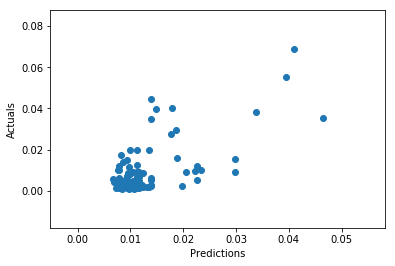

In [30]:
y_pred = ada.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [31]:
perm = eli5.sklearn.PermutationImportance(ada).fit(X_test, y_test)

In [34]:
eli5.show_weights(perm)

Weight,Feature
0.2701 ± 0.1042,x1
0.0818 ± 0.0456,x5
0.0724 ± 0.1027,x6
0.0257 ± 0.0371,x9
0.0084 ± 0.0189,x7
0.0080 ± 0.0061,x17
0.0059 ± 0.0161,x3
0.0054 ± 0.0178,x16
0.0010 ± 0.0032,x14
-0.0004 ± 0.0171,x11


In [35]:
r2_score(y_test, y_pred)


0.36627779678461003

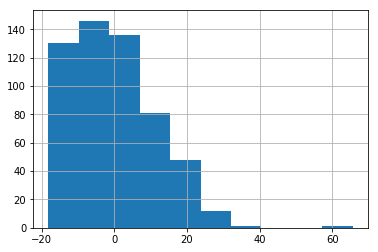

In [36]:
df_pca[0].hist()